# Juan Ruiz Juan Ortega Juan Cerquera
# Cinematica inversa robot Irb140

### Librerias

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

### DH Irb140 en clase de robotic-toolbox

In [2]:
irb140 = rtb.models.DH.IRB140()
irb140

DHRobot: IRB 140 (by ABB), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬───────┬──────┬────────┬─────────┬────────┐
│θⱼ  │  dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼───────┼──────┼────────┼─────────┼────────┤
│ q1 │ 0.352 │ 0.07 │ -90.0° │ -180.0° │ 180.0° │
│ q2 │     0 │ 0.36 │   0.0° │ -100.0° │ 100.0° │
│ q3 │     0 │    0 │ -90.0° │ -220.0° │  60.0° │
│ q4 │  0.38 │    0 │  90.0° │ -200.0° │ 200.0° │
│ q5 │     0 │    0 │ -90.0° │ -120.0° │ 120.0° │
│ q6 │ 0.065 │    0 │   0.0° │ -400.0° │ 400.0° │
└────┴───────┴──────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬──────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5   │
├─────┼─────┼──────┼───────┼─────┼──────┼──────┤
│  qr │  0° │ -90° │  90°  │  0° │  90° │ -90° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0°  │
│  qd │  0° │ -90° │  180° │  0° │  0°  │ -90° │
└─────┴─────┴──────┴───────┴─────┴──────┴──────┘

## Cinematica directa

In [3]:
def sTdh(d, th, a, alpha):
    cth = sp.cos(th); sth = sp.sin(th)
    ca = sp.cos(alpha); sa = sp.sin(alpha)
    Tdh = sp.Matrix([[cth, -ca*sth,  sa*sth, a*cth],
                     [sth,  ca*cth, -sa*cth, a*sth],
                     [0,        sa,     ca,      d],
                     [0,         0,      0,      1]])
    return Tdh

def Tdh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

In [4]:

def scdirecta_irb140(q, l1, l2, l3, l4, l5):

    T01 = sTdh(    l1,    q[0],   l2,   -sp.pi/2)
    T12 = sTdh(     0,    q[1],   l3,          0)
    T23 = sTdh(     0,    q[2],    0,   -sp.pi/2)
    T34 = sTdh(    l4,    q[3],    0,    sp.pi/2)
    T45 = sTdh(     0,    q[4],    0,   -sp.pi/2)
    T56 = sTdh(    l5,    q[5],    0,          0)

    Tf = T01@(T12)@(T23)@(T34)@(T45)@(T56)
    last_column = Tf[:, -1]
    return last_column

In [6]:
q1, q2, q3, q4, q5, q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
l1, l2, l3, l4, l5 = sp.symbols('l1 l2 l3 l4 l5')
q = [q1,q2,q3,q4,q5,q6]

TeS = scdirecta_irb140(q, l1, l2, l3, l4, l5)
print(TeS)

Matrix([[l2*cos(q1) + l3*cos(q1)*cos(q2) + l4*(-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2)) + l5*(-((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + sin(q1)*sin(q4))*sin(q5) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q5))], [l2*sin(q1) + l3*sin(q1)*cos(q2) + l4*(-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2)) + l5*(-((-sin(q1)*sin(q2)*sin(q3) + sin(q1)*cos(q2)*cos(q3))*cos(q4) - sin(q4)*cos(q1))*sin(q5) + (-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2))*cos(q5))], [l1 - l3*sin(q2) + l4*(sin(q2)*sin(q3) - cos(q2)*cos(q3)) + l5*((sin(q2)*sin(q3) - cos(q2)*cos(q3))*cos(q5) - (-sin(q2)*cos(q3) - sin(q3)*cos(q2))*sin(q5)*cos(q4))], [1]])


In [7]:
def ncdirecta_irb140(q, l1, l2, l3, l4, l5):

    T01 = Tdh(    l1,    q[0],   l2,   -np.pi/2)
    T12 = Tdh(     0,    q[1],   l3,          0)
    T23 = Tdh(     0,    q[2],    0,   -np.pi/2)
    T34 = Tdh(    l4,    q[3],    0,    np.pi/2)
    T45 = Tdh(     0,    q[4],    0,   -np.pi/2)
    T56 = Tdh(    l5,    q[5],    0,          0)

    Tf = T01@(T12)@(T23)@(T34)@(T45)@(T56)
    last_column = Tf[:, -1]
    return last_column

In [8]:
l1 = 0.352
l2 = 0.07
l3 = 0.36
l4 = 0.38
l5 = 0.065
q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

TeN = ncdirecta_irb140(q, l1, l2, l3, l4, l5)
TeN

array([ 0.1859542 ,  0.0308539 , -0.08930135,  1.        ])

In [9]:
T = irb140.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])  # forward kinematics
print(T)

   0.2819   -0.4934   -0.8229    0.186     
  -0.7779   -0.6196    0.1051    0.03085   
  -0.5617    0.6105   -0.5584   -0.0893    
   0         0         0         1         



### Jacobiano

In [10]:
from sympy import sin, cos, Matrix
# Definir las variables simbólicas de la función vectorial
q1, q2, q3, q4, q5, q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
l1, l2, l3, l4, l5 = sp.symbols('l1 l2 l3 l4 l5')

# Definir las funciones x, y, z como se indican
x = TeS[0,:]
y = TeS[1,:]
z = TeS[1,:]
X = Matrix([x,y,z])
Y = Matrix([q1, q2, q3, q4, q5])

Jacobian = X.jacobian(Y)
Jacobian


Matrix([
[  -l2*sin(q1) - l3*sin(q1)*cos(q2) + l4*(sin(q1)*sin(q2)*cos(q3) + sin(q1)*sin(q3)*cos(q2)) + l5*(-((sin(q1)*sin(q2)*sin(q3) - sin(q1)*cos(q2)*cos(q3))*cos(q4) + sin(q4)*cos(q1))*sin(q5) + (sin(q1)*sin(q2)*cos(q3) + sin(q1)*sin(q3)*cos(q2))*cos(q5)), -l3*sin(q2)*cos(q1) + l4*(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3)) + l5*((sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*cos(q5) - (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q5)*cos(q4)), l4*(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3)) + l5*((sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*cos(q5) - (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q5)*cos(q4)), -l5*(-(-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*sin(q4) + sin(q1)*cos(q4))*sin(q5), l5*(-((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + sin(q1)*sin(q4))*cos(q5) - (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q5))],
[l2*cos(q1) + l3*cos(q1)*cos(q2) + l4*(-sin(q2)*cos(q1)*cos(q3) - sin(q3)*

## Cinematica inversa analitica

In [11]:
import numpy as np
from sympy import sin, cos
import math

# Función que realiza el cálculo de la cinemática inversa (calculado usando el método de Newton)
def cinematica_inversa_Newton(Xdeseado, Qinicial, L, max_iter=100, epsilon=1e-4):
    # Es importante usar "copy" para no sobrescribir el valor original
    q = Qinicial.copy()
    # Almacenamiento del error
    ee = []
    q1, q2, q3,q4,q5, = sp.symbols('q1 q2 q3 q4 q5')
    l1, l2, l3, l4,l5 = sp.symbols('l1 l2 l3 l4 l5')
    
    # Bucle principal
    for i in range(max_iter):    
        x = l2*cos(q1) + l3*cos(q1)*cos(q2) + l4*(-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2)) + l5*(-((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + sin(q1)*sin(q4))*sin(q5) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q5))
        y = l2*sin(q1) + l3*sin(q1)*cos(q2) + l4*(-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2)) + l5*(-((-sin(q1)*sin(q2)*sin(q3) + sin(q1)*cos(q2)*cos(q3))*cos(q4) - sin(q4)*cos(q1))*sin(q5) + (-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2))*cos(q5))
        z = l1 - l3*sin(q2) + l4*(sin(q2)*sin(q3) - cos(q2)*cos(q3)) + l5*((sin(q2)*sin(q3) - cos(q2)*cos(q3))*cos(q5) - (-sin(q2)*cos(q3) - sin(q3)*cos(q2))*sin(q5)*cos(q4))


        X = Matrix([x,y,z])
        Y = Matrix([q1,q2,q3,q4,q5])

        J = X.jacobian(Y).subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4])])

        Ja = np.array(J).astype('float64')
        
        x_np = np.array(x.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4])])).astype('float64')
        y_np = np.array(y.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4])])).astype('float64')
        z_np = np.array(z.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4])])).astype('float64')
        
        f = np.array([x_np, y_np, z_np])
        
        e = Xdeseado-f
    
        q = q + np.dot(np.linalg.pinv(Ja), e)
        
        enorm = np.linalg.norm(e)
        print("Error en la iteración {}: {}".format(i, np.round(enorm,4)))
        ee.append(enorm)  

        if (enorm < epsilon):
            break
    return q, ee

# Prueba de la cinemática inversa
# -------------------------------
# Parámetros del robot
l1 = 0.352
l2 = 0.07
l3 = 0.36
l4 = 0.38
l5 = 0.065
L = np.array([0.352, 0.07, 0.36,0.38, 0.065])
# Valor articular inicial
qinit = np.array([0, 0, 0, 0, 0])

# Valor x,y deseado (en el espacio cartesiano)
xd = np.array([0.186, 0.03085, -0.0893])
# Hiperparámetros
epsilon = 1e-4         # Condición para el término
max_iteraciones = 100000  # Máximo número de iteraciones
 
# Cinemática Inversa
q, e = cinematica_inversa_Newton(xd, qinit, L, max_iteraciones, epsilon)
print("\nValores articulares obtenidos:", np.round(q,4))

Error en la iteración 0: 0.246
Error en la iteración 1: 0.0685
Error en la iteración 2: 0.008
Error en la iteración 3: 0.0001

Valores articulares obtenidos: [0.1643 0.1786 0.3725 0.0024 0.0502]


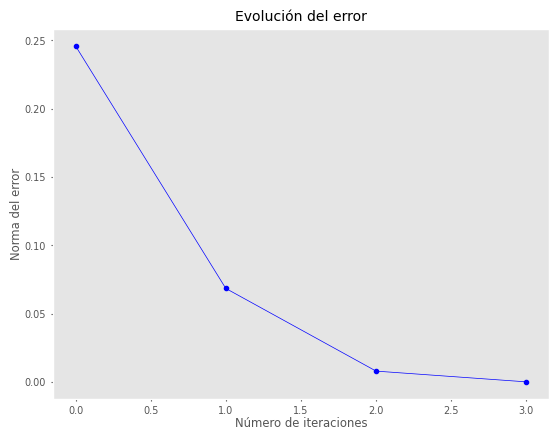

In [12]:
# Gráfico del error (debe ser decreciente)
plt.plot(e,'b')
plt.plot(e,'b.')
plt.title("Evolución del error"); plt.grid()
plt.xlabel("Número de iteraciones"); plt.ylabel("Norma del error");

## Cinematica inversa con robotic-toolbox

In [13]:
T = irb140.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
T

   0.2819   -0.4934   -0.8229    0.186     
  -0.7779   -0.6196    0.1051    0.03085   
  -0.5617    0.6105   -0.5584   -0.0893    
   0         0         0         1         


In [14]:
T = irb140.fkine([0.1643, 0.1786, 0.3725, 0.0024, 0.0502, 0.6])
T

   0.7629   -0.3262   -0.5581    0.186     
  -0.4479   -0.8893   -0.09241   0.03084   
  -0.4662    0.3205   -0.8246   -0.08929   
   0         0         0         1         


In [15]:
T = irb140.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
sol = irb140.ikine_LM(T)                          
print(sol)

IKsolution(q=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), success=True, reason=None, iterations=12, residual=4.7619681235006635e-12)


## Cargar el URDF

In [173]:
irb140_info = rtb.models.DH.IRB140()
irb140_info

DHRobot: IRB 140 (by ABB), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬───────┬──────┬────────┬─────────┬────────┐
│θⱼ  │  dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼───────┼──────┼────────┼─────────┼────────┤
│ q1 │ 0.352 │ 0.07 │ -90.0° │ -180.0° │ 180.0° │
│ q2 │     0 │ 0.36 │   0.0° │ -100.0° │ 100.0° │
│ q3 │     0 │    0 │ -90.0° │ -220.0° │  60.0° │
│ q4 │  0.38 │    0 │  90.0° │ -200.0° │ 200.0° │
│ q5 │     0 │    0 │ -90.0° │ -120.0° │ 120.0° │
│ q6 │ 0.065 │    0 │   0.0° │ -400.0° │ 400.0° │
└────┴───────┴──────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬──────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5   │
├─────┼─────┼──────┼───────┼─────┼──────┼──────┤
│  qr │  0° │ -90° │  90°  │  0° │  90° │ -90° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0°  │
│  qd │  0° │ -90° │  180° │  0° │  0°  │ -90° │
└─────┴─────┴──────┴───────┴─────┴──────┴──────┘

In [113]:
irb140_urdf_path = rtb.models.DH.IRB140.URDF()
print(irb140_urdf_path)

AttributeError: type object 'IRB140' has no attribute 'URDF'

In [151]:
URDF_read(irb140.urdf)

NameError: name 'URDF_read' is not defined